In [64]:
import os

os.environ["USE_DD_PILLOW"]="True"
os.environ["USE_DD_OPENCV"]="False"

import deepdoctection as dd
from matplotlib import pyplot as plt
from IPython.core.display import HTML

In [65]:
path="/Users/alexandreclin/Desktop/test/input/report2.pdf" # Use the PDF in the sample folder

In [66]:
import pandas as pd
from PyPDF2 import PdfReader, PdfWriter
from pathlib import Path
import tempfile

def save_page_as_pdf(page, output_path):
    writer = PdfWriter()
    writer.add_page(page)
    with open(output_path, 'wb') as output_pdf:
        writer.write(output_pdf)

reader = PdfReader(path)
page = reader.pages[0]
with tempfile.NamedTemporaryFile(delete=False, suffix=".pdf") as temp_pdf:
    temp_pdf_path = temp_pdf.name
    save_page_as_pdf(page, temp_pdf_path)

        # Appel de la fonction process avec le chemin du fichier temporaire

    # Suppression du fichier temporaire après traitement
    

In [67]:
path = temp_pdf_path

In [68]:
print(path)

/var/folders/ts/vp0dd4dj2hdgxg3yf4r9b89r0000gn/T/tmpjjyxwsux.pdf


In [69]:
    
analyzer =dd.get_dd_analyzer(config_overwrite=
   ["PT.LAYOUT.WEIGHTS=microsoft/table-transformer-detection/pytorch_model.bin",
    "PT.ITEM.WEIGHTS=microsoft/table-transformer-structure-recognition/pytorch_model.bin",
    "PT.ITEM.FILTER=['table']",
    "OCR.USE_DOCTR=True",
    "OCR.USE_TESSERACT=False",
    "TEXT_ORDERING.INCLUDE_RESIDUAL_TEXT_CONTAINER=True",
    "TEXT_ORDERING.PARAGRAPH_BREAK=0.01",
                        ])

#analyzer.pipe_component_list[0].predictor.config.threshold = 0.4  # default threshold is at 0.1

df = analyzer.analyze(path=path)
df.reset_state()
df_iter = iter(df)

[0708 17:02.59 @dd.py:459]  INF  Config: 
 {'DEVICE': device(type='mps'),
 'LANGUAGE': None,
 'LAYOUT_NMS_PAIRS': {'COMBINATIONS': None, 'PRIORITY': None, 'THRESHOLDS': None},
 'LIB': 'PT',
 'OCR': {'CONFIG': {'TESSERACT': 'dd/conf_tesseract.yaml'},
         'USE_DOCTR': True,
         'USE_TESSERACT': False,
         'USE_TEXTRACT': False,
         'WEIGHTS': {'DOCTR_RECOGNITION': {'PT': 'doctr/crnn_vgg16_bn/pt/crnn_vgg16_bn-9762b0b0.pt',
                                           'TF': 'doctr/crnn_vgg16_bn/tf/crnn_vgg16_bn-76b7f2c6.zip'},
                     'DOCTR_WORD': {'PT': 'doctr/db_resnet50/pt/db_resnet50-ac60cadc.pt',
                                    'TF': 'doctr/db_resnet50/tf/db_resnet50-adcafc63.zip'}}},
 'PDF_MINER': {'X_TOLERANCE': 3, 'Y_TOLERANCE': 3},
 'PT': {'CELL': {'FILTER': None,
                 'WEIGHTS': 'cell/d2_model_1849999_cell_inf_only.pt',
                 'WEIGHTS_TS': 'cell/d2_model_1849999_cell_inf_only.ts'},
        'ITEM': {'FILTER': ['table'],
  

[0708 17:03.00 @doctectionpipe.py:84]  INF  Processing tmpjjyxwsux_0.pdf
[0708 17:03.03 @context.py:126]  INF  ImageLayoutService total: 1.5338 sec.
[0708 17:03.06 @context.py:126]  INF  SubImageLayoutService total: 3.4625 sec.
[0708 17:03.09 @context.py:126]  INF  SubImageLayoutService total: 2.8805 sec.
[0708 17:03.09 @context.py:126]  INF  TableSegmentationService total: 0.0279 sec.
[0708 17:03.09 @context.py:126]  INF  TableSegmentationRefinementService total: 0.0114 sec.
[0708 17:03.09 @context.py:126]  INF  TextExtractionService total: 0.1344 sec.
[0708 17:03.09 @context.py:126]  INF  MatchingService total: 0.0016 sec.
[0708 17:03.09 @context.py:126]  INF  TextOrderService total: 0.0161 sec.


list

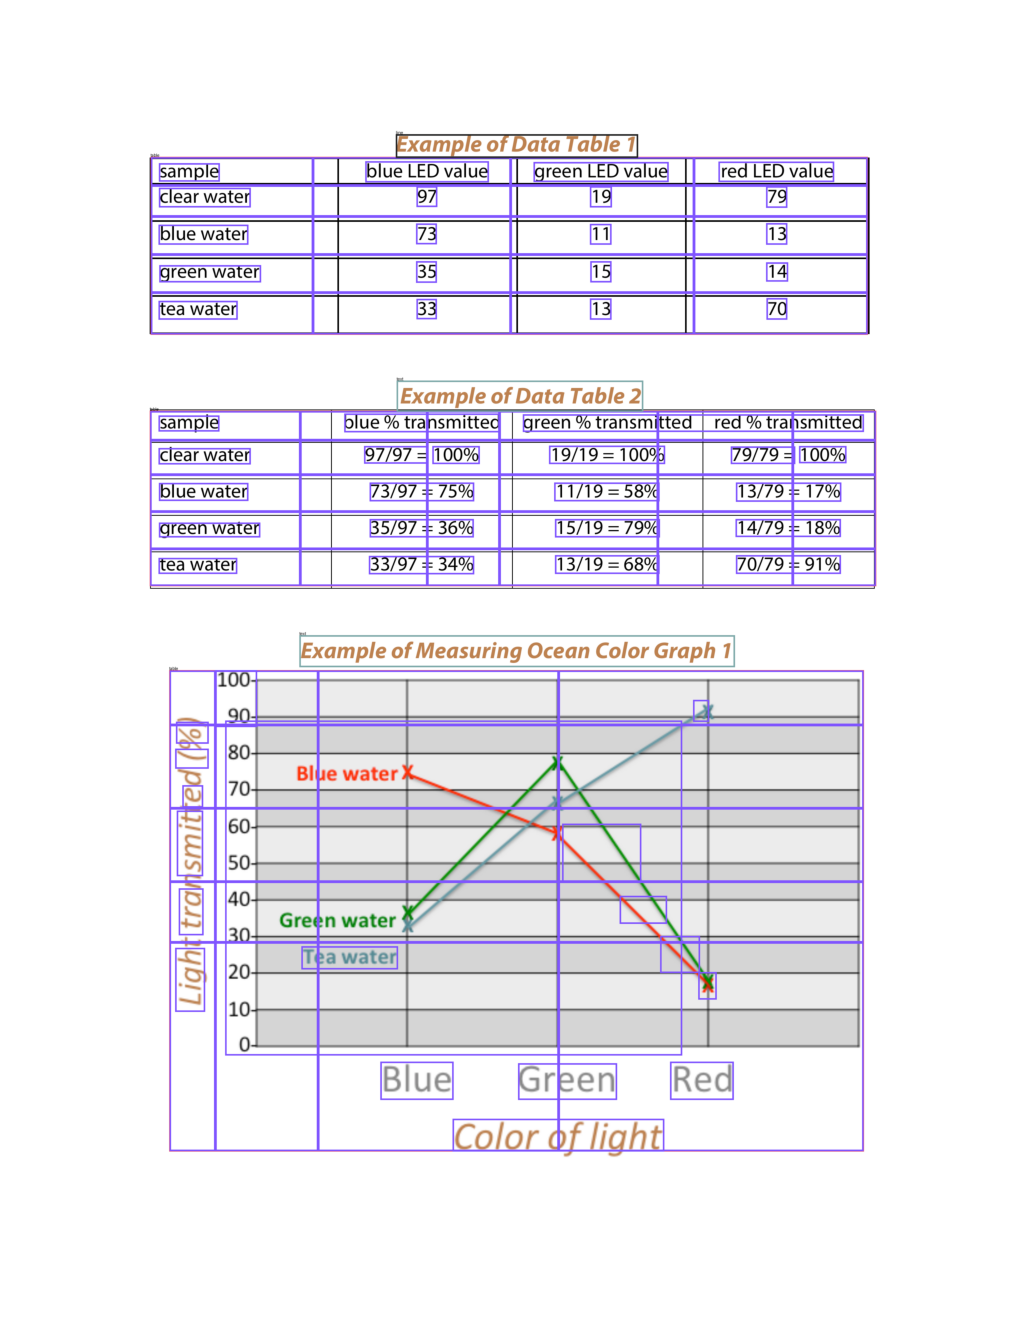

In [70]:
dp = next(df_iter)
np_image = dp.viz()

plt.figure(figsize = (25,17))
plt.axis('off')
plt.imshow(np_image)
type(dp.tables[0].csv)

In [71]:
os.remove(temp_pdf_path)

In [72]:
print(dp.tables[0].csv)

[['sample ', 'blue LED value ', 'green LED value ', 'red LED value '], ['clear water ', '97 ', '19 ', '79 '], ['blue water ', '73 ', '11 ', '13 '], ['green water ', '35 ', '15 ', '14 '], ['tea water ', '33 ', '13 ', '70 ']]


In [73]:
HTML(dp.tables[2].html)

[0708 17:03.12 @view.py:321]  WRN  html construction not possible
[0708 17:03.12 @view.py:321]  WRN  html construction not possible
[0708 17:03.12 @view.py:321]  WRN  html construction not possible
[0708 17:03.12 @view.py:321]  WRN  html construction not possible
[0708 17:03.12 @view.py:321]  WRN  html construction not possible
[0708 17:03.12 @view.py:321]  WRN  html construction not possible
[0708 17:03.12 @view.py:321]  WRN  html construction not possible
[0708 17:03.12 @view.py:321]  WRN  html construction not possible
[0708 17:03.12 @view.py:321]  WRN  html construction not possible
[0708 17:03.12 @view.py:321]  WRN  html construction not possible
[0708 17:03.12 @view.py:321]  WRN  html construction not possible


In [74]:
dp.get_attribute_names()

{<PageType.angle>,
 'chunks',
 'document_id',
 <PageType.document_type>,
 'file_name',
 <PageType.language>,
 'layouts',
 'location',
 'page_number',
 'tables',
 'text',
 'words'}

In [75]:
for layout in dp.layouts:
    print(f"Category: {layout.category_name}, Text: {layout.text}")
    if layout.category_name=="title":
        print(f"Title: {layout.text}")

Category: LayoutType.text, Text: Example of Measuring Ocean Color Graph 1
Category: LayoutType.text, Text: Example of Data Table 2
Category: LayoutType.line, Text: Example of Data Table 1
